# Redes Neuronales

Ahora en el contexto del aprendizaje automatico, queremos eoncontrar derivadas parciales de una funcion objetivo con respecto a los parametros del modelo. En el caso de problemas de clasificacion binaria multi-variable contamos con datos de entrada $\textbf X=(\mathbf x_1,\ldots,\mathbf x_n)$ y sus correspondientes etiquetas $\textbf y=(y_1,\ldots,y_n)$.

Para cada tupla $(x_i,y_i)$ podemos establecer la siguiente relacion lineal:

\begin{align}
\text{log}\left(\frac{p( C=1 \vert \mathbf x_i )}{p(C=0 \vert \mathbf x_i )} \right)&=b+\sum_{j=1}^{d} w_j\,x_{ij}\\
&=\mathbf w^T \mathbf x_i+b
\end{align}  

Al mismo tiempo , podemos obtener las probabilidades condicionales para cada clase:

\begin{align}
p(C=1\vert \textbf x_i)&= \phi(\mathbf w^T \mathbf x_i+b)=\frac{\text{exp}(\mathbf w^T \mathbf x_i+b)}{1+\text{exp}(\mathbf w^T \mathbf x_i+b)}
\end{align}

Donde $\phi(\cdot)$ es la llamada función sigmoide.

La funcion sigmoide convierte cualquier entrada $\mathbf w^T \mathbf x_i \in [-\inf,\inf]$ hacia el intervalo $(0,1)$, por lo tanto podemos utilizar la funcion de verosimilitud de la distribucion de Bernoulli para comparar las probabilidad de clase con las etiquetas binarias:

\begin{align}
p(\textbf y, \textbf X,\mathbf w)= \prod_{i=1}^N (\phi(\mathbf w^T \mathbf x_i+b))^{y_i} \times (1-\phi(\mathbf w^T \mathbf x_i+b))^{1-y_i}
\end{align}

Ahora queremos obtener los parametros $\hat{\mathbf w}$ que maximicen la verosimilitud $p(\textbf y, \textbf X,\mathbf w)$. Dado que la funcion logaritmo es monotona en todo el dominio $[-\inf,\inf]$ utilizamos $\operatorname{log} p(\textbf y, \textbf X,\mathbf w)$ como funcion objetivo (log-loss):

\begin{align}
L(\mathbf w)=\sum_{i=1}^N (y_i \operatorname{log} \phi(\mathbf w^T \mathbf x_i+b)) + ({1-y_i}) \operatorname{log} (1-\phi(\mathbf w^T \mathbf x_i+b))
\end{align}

Ahora que tenemos definida una funcion objetivo, podemos evaluar iterativamente los pesos $w$ escogiendo la direccion de maximo crecimiento (gradiente).

\begin{align}
\mathbf w^{j+1}= \mathbf  w^j-\eta \frac{\partial L(\mathbf w)}{\partial \mathbf w}\\
b^{j+1}=   b^j-\eta \frac{\partial L(b)}{\partial  b}
\end{align}

Donde $\eta > 0$ es un factor de descuento o tasa de aprendizaje.

In [2]:
import numpy as np
import matplotlib.pyplot as plt

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def net(params,X):
    logits =  np.dot(X,params['weight'])+params['bias']
    return sigmoid(logits)

def binary_cross_entropy(params,X,y):
    # Training loss is the negative log-likelihood of the training labels.
    y_hat = net(params, X)
    label_probabilities = np.log(y_hat) * y + np.log((1 - y_hat)) * (1 - y)
    return -1.0*np.mean(label_probabilities)

# Build a function that returns gradients of training loss using autograd.
def grad(params, X, y):
    y_hat = net(params, X)
    error = y_hat - y.reshape(-1, 1)
    grad_w = np.dot(X.T, error) / X.shape[0]
    grad_b = np.mean(error, axis=0)
    return {'weight': grad_w, 'bias': grad_b}

\begin{align*}
\frac{\partial }{\partial \mathbf w} L(\mathbf w) &= -\frac{1}{N}\sum\limits_{i=1}^{N}{y_i \frac{\partial }{\partial \theta_j} log \phi(\mathbf w^T \mathbf x_i)   + (1-y_i)\frac{\partial }{\partial \mathbf w} \log{(1 - \phi(\mathbf w^T \mathbf x_i))}} \\
&=-\frac{1}{N}\sum\limits_{i=1}^{N}{y_i\,x_i \left(1-\phi(\mathbf w^T \mathbf x_i)\right) - (1-y_i)x_i\phi(\mathbf w^T \mathbf x_i)} \\
&=-\frac{1}{N}\sum\limits_{i=1}^{N}{y_i x_i - x_i\phi(\mathbf w^T \mathbf x_i)} \\
&=\frac{1}{N}\sum\limits_{i=1}^{N}{(\phi(\mathbf w^T \mathbf x_i+b)-y_i)x_i}
\end{align*}

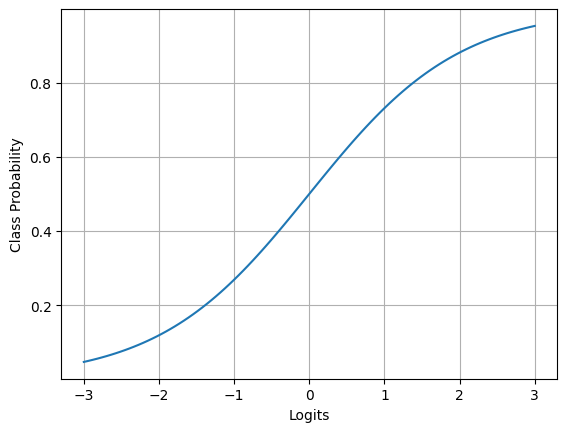

In [3]:
x=np.linspace(-3,3,num=100)
plt.plot(x,sigmoid(x))
plt.xlabel("Logits")
plt.ylabel("Class Probability")
plt.grid()

In [4]:
# Build a toy dataset.
X = np.array([[0.52, 1.12,  0.77],
                   [0.88, -1.08, 0.15],
                   [0.52, 0.06, -1.30],
                   [0.74, -2.49, 1.39]])
y = np.array([False, True, False, True])
y = y.astype(np.int32)

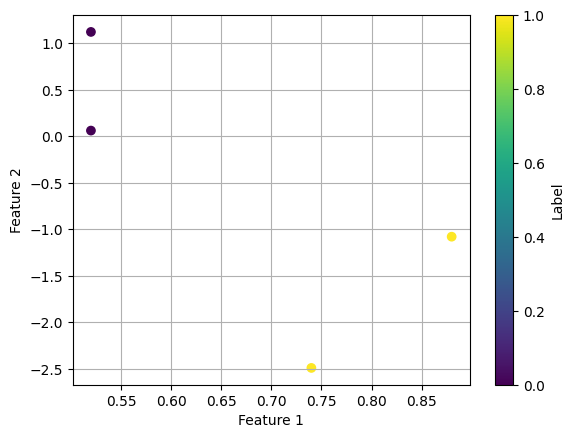

In [5]:
plt.scatter(X[:,0],X[:,1],c=y)
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.grid()
plt.colorbar(label="Label") 

In [6]:
def random_layer_params(input_dim=1, scale=1.0):
  W = scale * np.random.randn(input_dim, 1)  # normal distribution, mean 0
  b = scale * np.random.randn(1)
  return W,b

def init_model_params(n_in):
  params=dict()
  params['weight'],params['bias']=random_layer_params(input_dim=n_in)
  return params

np.random.seed(0)
params=init_model_params(n_in=X.shape[-1])

In [7]:
def train_net(params, X, y, learning_rate=0.1,epochs=100):
    loss=[]
    for epoch in range(epochs):
        grads = grad(params, X, y)
        for var in params.keys():
            params[var] -= learning_rate * grads[var]
        loss.append(binary_cross_entropy(params, X, y))
        if epoch % (epochs//10) == 0:
            print(f"Epoch {epoch}, loss: {binary_cross_entropy(params, X, y):.3f}")
    return params,loss

In [8]:
params,loss=train_net(params,X,y,learning_rate=1e-2,epochs=1500)

Epoch 0, loss: 1.759
Epoch 150, loss: 1.539
Epoch 300, loss: 1.402
Epoch 450, loss: 1.348
Epoch 600, loss: 1.361
Epoch 750, loss: 1.410
Epoch 900, loss: 1.471
Epoch 1050, loss: 1.534
Epoch 1200, loss: 1.595
Epoch 1350, loss: 1.654


Text(0, 0.5, 'x2')

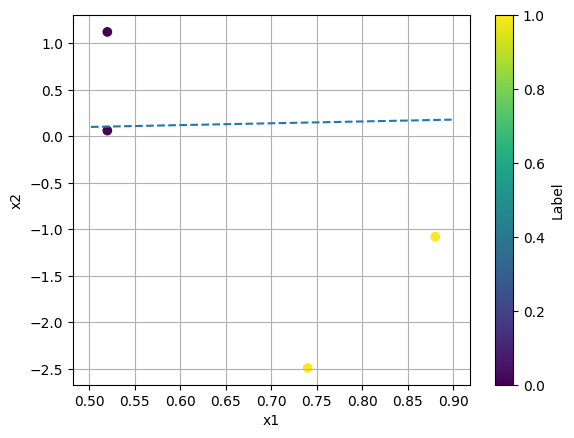

In [9]:
import matplotlib.pyplot as plt


plt.scatter(X[:,0],X[:,1],c=y)
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.grid()
plt.colorbar(label="Label") 
xmin, xmax = plt.xlim()
ymin, ymax = plt.ylim()

def line(x0):
   return (-(x0 * params['weight'][0]) ) / params['weight'][1]

plt.plot([xmin, xmax], [line(xmin), line(xmax)],ls="--")
plt.xlabel('x1')
plt.ylabel('x2')


In [10]:
for true,pred in zip(y, net(params,X).flatten()>0.5):
    print(f"True: {true}, Predicted: {pred}")

True: 0, Predicted: False
True: 1, Predicted: True
True: 0, Predicted: False
True: 1, Predicted: True


# Datos Desbalanceados

La función de pérdida Focal (Focal Loss) toma la siguiente forma:
\begin{align*}
\mathcal{L}_{FL} = -\alpha_t (1-p_t)^\gamma \log(p_t) 
\end{align*}

In [ ]:
def focal_loss(params,X,y, alpha=0.25, gamma=2.0):
    y_true = y.reshape(-1, 1)
    y_pred = net(params, X)
    epsilon = 1e-12
    y_pred = np.clip(y_pred, epsilon, 1. - epsilon)
    # Calcular p_t
    p_t = y_pred * y_true + (1 - y_pred) * (1 - y_true)
    # Calcular alpha_t
    alpha_t = alpha * y_true + (1 - alpha) * (1 - y_true)
    # Factor de modulación
    modulating_factor = (1.0 - p_t) ** gamma
    # Pérdida focal
    loss = - alpha_t * modulating_factor * np.log(p_t)
    return np.mean(loss)

In [253]:
def grad_focal(params, X, y, alpha=0.25, gamma=2.0):
    y_true = y.reshape(-1, 1)
    y_pred = net(params, X)
    epsilon = 1e-12
    y_pred = np.clip(y_pred, epsilon, 1. - epsilon)
    p_t = y_pred * y_true + (1 - y_pred) * (1 - y_true)
    alpha_t = alpha * y_true + (1 - alpha) * (1 - y_true)
    modulating_factor = (1.0 - p_t) ** gamma

    # Derivative of focal loss w.r.t. logits
    d_loss_d_logits = (
        alpha_t * modulating_factor * gamma * (-1) * np.log(p_t) / (1.0 - p_t + epsilon) * (y_pred - y_true)
        - alpha_t * modulating_factor / (p_t + epsilon) * (y_true - y_pred)
    )
    # Chain rule: d_sigmoid/d_logits = y_pred * (1 - y_pred)
    d_loss_d_logits *= y_pred * (1 - y_pred)

    grad_w = np.dot(X.T, d_loss_d_logits) / X.shape[0]
    grad_b = np.mean(d_loss_d_logits, axis=0)
    return {'weight': grad_w, 'bias': grad_b}


### Preparación de Datos

El conjunto de datos contiene transacciones realizadas con tarjetas de crédito en septiembre de 2013 por titulares europeos. Este conjunto de datos presenta transacciones ocurridas en dos días, con $492$ fraudes de un total de $284.807$ transacciones. El conjunto de datos presenta un alto desequilibrio; la clase positiva (fraudes) representa el $0,172 %$ del total de transacciones.

Contiene únicamente variables numéricas de entrada, resultado de una transformación PCA. Lamentablemente, por motivos de confidencialidad, no podemos proporcionar las características originales ni más información sobre los datos. Las características V1, V2, … V28 son los componentes principales obtenidos con PCA; las únicas características que no se han transformado con PCA son «Tiempo» e «Importe». La característica «Tiempo» contiene los segundos transcurridos entre cada transacción y la primera transacción del conjunto de datos. La característica «Importe» es el importe de la transacción; esta característica puede utilizarse para el aprendizaje sensible al coste basado en ejemplos. La característica «Clase» es la variable de respuesta y toma el valor 1 en caso de fraude y 0 en caso contrario. Dada la tasa de desequilibrio de clases, recomendamos medir la precisión mediante el Área Bajo la Curva de Precisión-Recuperación (AUPRC). La precisión de la matriz de confusión no es significativa para la clasificación desequilibrada.

In [274]:
import pandas as pd

raw_df = pd.read_csv('https://storage.googleapis.com/download.tensorflow.org/data/creditcard.csv')


In [276]:
raw_df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [277]:
neg, pos = np.bincount(raw_df['Class'])
total = neg + pos
print('Examples:\n    Total: {}\n    Positive: {} ({:.2f}% of total)\n'.format(
    total, pos, 100 * pos / total))


Examples:
    Total: 284807
    Positive: 492 (0.17% of total)



In [278]:
cleaned_df = raw_df.copy()

# You don't want the `Time` column.
cleaned_df.pop('Time')

# The `Amount` column covers a huge range. Convert to log-space.
eps = 0.001 # 0 => 0.1¢
cleaned_df['Log Ammount'] = np.log(cleaned_df.pop('Amount')+eps)


In [283]:
from sklearn.model_selection import train_test_split

# Use a utility from sklearn to split and shuffle your dataset.
train_df, test_df = train_test_split(cleaned_df, test_size=0.2)
train_df, val_df = train_test_split(train_df, test_size=0.2)

# Form np arrays of labels and features.
train_labels = np.array(train_df.pop('Class')).astype(np.int32)
val_labels = np.array(val_df.pop('Class')).astype(np.int32)
test_labels = np.array(test_df.pop('Class')).astype(np.int32)

train_features = np.array(train_df)
val_features = np.array(val_df)
test_features = np.array(test_df)


In [297]:
from sklearn.preprocessing import StandardScaler


scaler = StandardScaler()
train_features = scaler.fit_transform(train_features)

val_features = scaler.transform(val_features)
test_features = scaler.transform(test_features)

train_features = np.clip(train_features, -5, 5)
val_features = np.clip(val_features, -5, 5)
test_features = np.clip(test_features, -5, 5)


print('Training labels shape:', train_labels.shape)
print('Validation labels shape:', val_labels.shape)
print('Test labels shape:', test_labels.shape)

print('Training features shape:', train_features.shape)
print('Validation features shape:', val_features.shape)
print('Test features shape:', test_features.shape)


Training labels shape: (182276,)
Validation labels shape: (45569,)
Test labels shape: (56962,)
Training features shape: (182276, 29)
Validation features shape: (45569, 29)
Test features shape: (56962, 29)


In [298]:
train_labels.shape, train_features.shape

((182276,), (182276, 29))

In [302]:
def train_net_minibatch(params, X, y,X_val,y_val, learning_rate=0.01, epochs=100, batch_size=2):
    loss = []
    n_samples = X.shape[0]
    for epoch in range(epochs):
        # Shuffle data at the start of each epoch
        indices = np.arange(n_samples)
        np.random.shuffle(indices)
        X_shuffled = X[indices]
        y_shuffled = y[indices]
        epoch_loss = 0
        for start in range(0, n_samples, batch_size):
            end = start + batch_size
            X_batch = X_shuffled[start:end]
            y_batch = y_shuffled[start:end]
            grads = grad(params, X_batch, y_batch)
            for var in params.keys():
                params[var] -= learning_rate * grads[var]
            batch_loss = binary_cross_entropy(params, X_batch, y_batch)
            epoch_loss += batch_loss * X_batch.shape[0]
        epoch_loss /= n_samples
        loss.append(epoch_loss)
        if epoch % (epochs // 10) == 0:
            val_loss = binary_cross_entropy(params, X_val, y_val)
            print(f"Epoch {epoch},  train loss: {epoch_loss:.4f}, validation loss: {val_loss:.4f} ")
    return params, loss


def train_net_focal(params, X, y, learning_rate=0.01, epochs=100, batch_size=2, alpha=0.25, gamma=2.0):
    loss = []
    n_samples = X.shape[0]
    for epoch in range(epochs):
        # Shuffle data at the start of each epoch
        indices = np.arange(n_samples)
        np.random.shuffle(indices)
        X_shuffled = X[indices]
        y_shuffled = y[indices]
        epoch_loss = 0
        for start in range(0, n_samples, batch_size):
            end = start + batch_size
            X_batch = X_shuffled[start:end]
            y_batch = y_shuffled[start:end]
            grads = grad_focal(params, X_batch, y_batch, alpha=alpha, gamma=gamma)
            for var in params.keys():
                params[var] -= learning_rate * grads[var]
            batch_loss = np.mean(focal_loss(params, X_batch, y_batch, alpha=alpha, gamma=gamma))
            epoch_loss += batch_loss * X_batch.shape[0]
        epoch_loss /= n_samples
        loss.append(epoch_loss)
        if epoch % (epochs // 10) == 0:
            print(f"Epoch {epoch}, focal loss: {epoch_loss:.4f}")
    return params, loss

In [303]:
params=init_model_params(n_in=train_features.shape[-1])
params,loss=train_net_minibatch(params, train_features, train_labels, val_features, val_labels, learning_rate=0.01, epochs=100, batch_size=64)

Epoch 0,  train loss: 0.3582, validation loss: 0.0372 
Epoch 10,  train loss: 0.0150, validation loss: 0.0181 
Epoch 20,  train loss: 0.0147, validation loss: 0.0182 
Epoch 30,  train loss: 0.0149, validation loss: 0.0188 
Epoch 40,  train loss: 0.0151, validation loss: 0.0192 
Epoch 50,  train loss: 0.0153, validation loss: 0.0196 
Epoch 60,  train loss: 0.0157, validation loss: 0.0199 
Epoch 70,  train loss: 0.0159, validation loss: 0.0203 
Epoch 80,  train loss: 0.0161, validation loss: 0.0205 
Epoch 90,  train loss: 0.0162, validation loss: 0.0208 


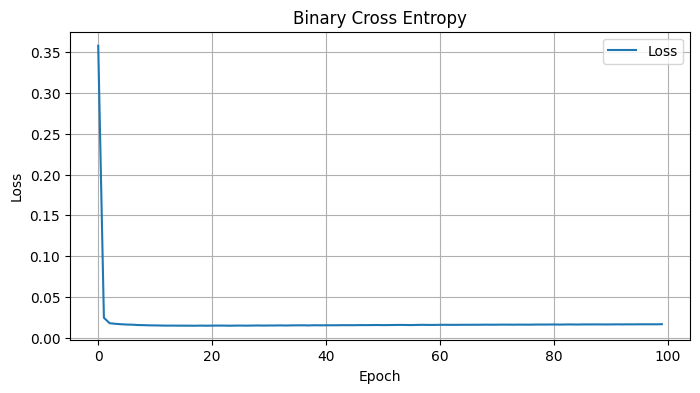

In [ ]:
def plot_loss(loss, title="Loss Curve"):
    import matplotlib.pyplot as plt
    plt.figure(figsize=(8,4))
    plt.plot(loss, label="Loss")
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.title(title)
    plt.grid(True)
    plt.legend()
    plt.
    plt.show()

plot_loss(loss,"Binary Cross Entropy")

In [307]:
y_hat = net(params, test_features)

In [308]:
from sklearn.metrics import accuracy_score

y_hat = net(params, test_features)
accuracy = accuracy_score(test_labels, np.int32(y_hat>0.5).reshape(-1))
print(f"Accuracy: {accuracy:.3f}")

Accuracy: 1.000


La precisión mide la proporción de instancias positivas correctamente identificadas entre todas las instancias identificadas como positivas. Se centra en la calidad de las predicciones positivas

$\texttt{precision}(y, \hat{y}) =\frac{TP}{TP+FP}$.


La recuperación mide la proporción de instancias positivas correctamente identificadas entre todas las instancias que son realmente positivas. Se centra en la capacidad del modelo para capturar todas las instancias positivas.

$\texttt{recall}(y, \hat{y}) =\frac{TP}{TP+FN}$.

Verdaderos Positivos (TP): Instancias que fueron clasificadas correctamente como positivas por el modelo.
Falsos Positivos (FP): Instancias que fueron clasificadas incorrectamente como positivas por el modelo (en realidad son negativas).
Verdaderos Negativos (TN): Instancias que fueron clasificadas correctamente como negativas por el modelo.
Falsos Negativos (FN): Instancias que fueron clasificadas incorrectamente como negativas por el modelo (en realidad son positivas).


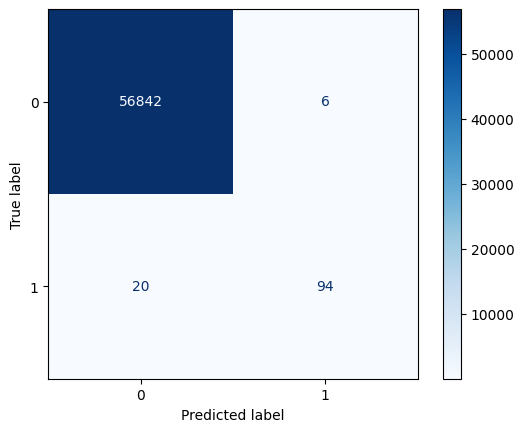

In [309]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_predictions(test_labels, np.int32(y_hat>0.5),cmap=plt.cm.Blues)

In [310]:
from sklearn.metrics import classification_report

print(classification_report(test_labels, y_hat>0.5))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56848
           1       0.94      0.82      0.88       114

    accuracy                           1.00     56962
   macro avg       0.97      0.91      0.94     56962
weighted avg       1.00      1.00      1.00     56962



AUPRC (Área bajo la curva Precision-Recall): 0.9015


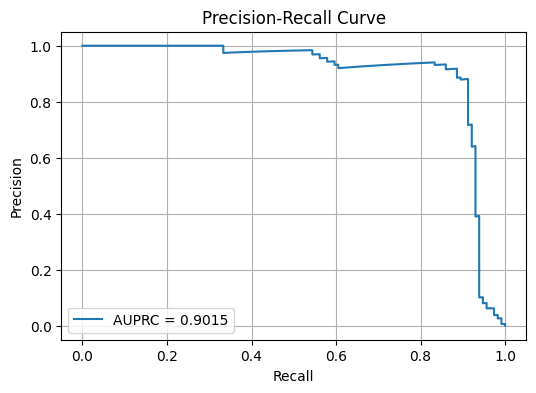

In [311]:
from sklearn.metrics import average_precision_score, precision_recall_curve
import matplotlib.pyplot as plt

# y_hat: probabilidades predichas por el modelo
# test_labels: etiquetas verdaderas

auprc = average_precision_score(test_labels, y_hat)
print(f"AUPRC (Área bajo la curva Precision-Recall): {auprc:.4f}")

precision, recall, _ = precision_recall_curve(test_labels, y_hat)
plt.figure(figsize=(6,4))
plt.plot(recall, precision, label=f'AUPRC = {auprc:.4f}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.grid(True)
plt.legend()
plt.show()